In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats

In [21]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [65]:
df = pd.read_csv("cc_test.csv")

In [66]:
df.head()

,id,fkey_reference_id,company,state,gender,age,marital,premium,benefit,inflation,schedule,total_ltc,face_amount,monthly_ltc,total_ltc_80,monthly_ltc_80,timestamp
0,123440,1115,Nationwide CareMatters II,AL,Female,40,Married,60000,6 Years,3% Compound,Single Pay,307778,102593,4275,1050839.0,13538.0,9/23/2019 2:21:12 AM
1,123441,1115,Nationwide CareMatters II,AL,Female,41,Married,60000,6 Years,3% Compound,Single Pay,284222,94741,3948,942147.0,12138.0,9/23/2019 2:25:29 AM
2,123442,1115,Nationwide CareMatters II,AL,Female,42,Married,60000,6 Years,3% Compound,Single Pay,278261,92754,3865,895522.0,11537.0,9/23/2019 2:26:47 AM
3,123443,1115,Nationwide CareMatters II,AL,Female,43,Married,60000,6 Years,3% Compound,Single Pay,272546,90849,3785,851580.0,10971.0,9/23/2019 2:26:59 AM
4,123444,1115,Nationwide CareMatters II,AL,Female,44,Married,60000,6 Years,3% Compound,Single Pay,267060,89020,3709,810135.0,10437.0,9/23/2019 2:27:11 AM


In [67]:
df.dtypes

id                     int64
fkey_reference_id      int64
company               object
state                 object
gender                object
age                    int64
marital               object
premium               object
benefit               object
inflation             object
schedule              object
total_ltc              int64
face_amount            int64
monthly_ltc            int64
total_ltc_80         float64
monthly_ltc_80       float64
timestamp             object
dtype: object

company: life insurance companies

state, gender, age, marital: above 4 are demographics

premium: payout for the value if something were to happen; closer to limits

benefit: policy term(?)

inflation: cost of living increase; value for 6 years might be 80,000 and the next six may do 80,000 * 1.03 to increase with COL; could be more frequently b/c of compound

schedule: 

total_ltc: 

face_amount: 

monthly_ltc: 

total_ltc_80: 

monthly_ltc_80: 

timestamp:


which combination of benefits is the most valuable? cost comparisons try to provide the equivalent answer. put all quotes in the calculator and find the equivalent value. what's the better deal? these calculators will find the equivalent terms by normalizing them. the quotes all say different things, but if they were all equivalent, then this is what the numbers would look it.

FROM REFERENCE TABLE:
company/product, gender, underwriting_class (always non-smoker), marital, premium, benefit_period, inflation_protection, premium_schedule

ref table sent to UI and combinations produced for all ages 40-70 and all states WHERE APPLICABLE; not all combinations are valid, so those don't make it to the final results



In [68]:
df.shape

(206, 17)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 17 columns):
id                   206 non-null int64
fkey_reference_id    206 non-null int64
company              206 non-null object
state                206 non-null object
gender               206 non-null object
age                  206 non-null int64
marital              206 non-null object
premium              206 non-null object
benefit              206 non-null object
inflation            206 non-null object
schedule             206 non-null object
total_ltc            206 non-null int64
face_amount          206 non-null int64
monthly_ltc          206 non-null int64
total_ltc_80         204 non-null float64
monthly_ltc_80       204 non-null float64
timestamp            206 non-null object
dtypes: float64(2), int64(6), object(9)
memory usage: 27.5+ KB


In [70]:
df = df[-df.isnull().any(axis=1)]

In [71]:
df = df.drop(columns=['id', 'fkey_reference_id', 'timestamp'])

In [72]:
categories = ['company', 'state', 'gender', 'marital', 'premium', 'benefit', 'inflation', 'schedule']

In [75]:
df = pd.get_dummies(df, columns=categories)

In [76]:
df.head()

,age,total_ltc,face_amount,monthly_ltc,total_ltc_80,monthly_ltc_80,company_Lincoln MoneyGuard II 2020,company_Lincoln MoneyGuard III,company_Nationwide CareMatters II,company_Pacific Life PremierCare Choice 2019,...,premium_50000,premium_60000,premium_80000,premium_90000,benefit_6 Years,inflation_3% Compound,inflation_5% Simple,inflation_None,schedule_10 Years,schedule_Single Pay
0,40,307778,102593,4275,1050839.0,13538.0,0,0,1,0,...,0,1,0,0,1,1,0,0,0,1
1,41,284222,94741,3948,942147.0,12138.0,0,0,1,0,...,0,1,0,0,1,1,0,0,0,1
2,42,278261,92754,3865,895522.0,11537.0,0,0,1,0,...,0,1,0,0,1,1,0,0,0,1
3,43,272546,90849,3785,851580.0,10971.0,0,0,1,0,...,0,1,0,0,1,1,0,0,0,1
4,44,267060,89020,3709,810135.0,10437.0,0,0,1,0,...,0,1,0,0,1,1,0,0,0,1


In [77]:
df.hist(figsize=(20,10), layout=(6,3), bins='auto')
plt.tight_layout()
plt.show()

ValueError: Layout of 6x3 must be larger than required size 80

<Figure size 1440x720 with 0 Axes>

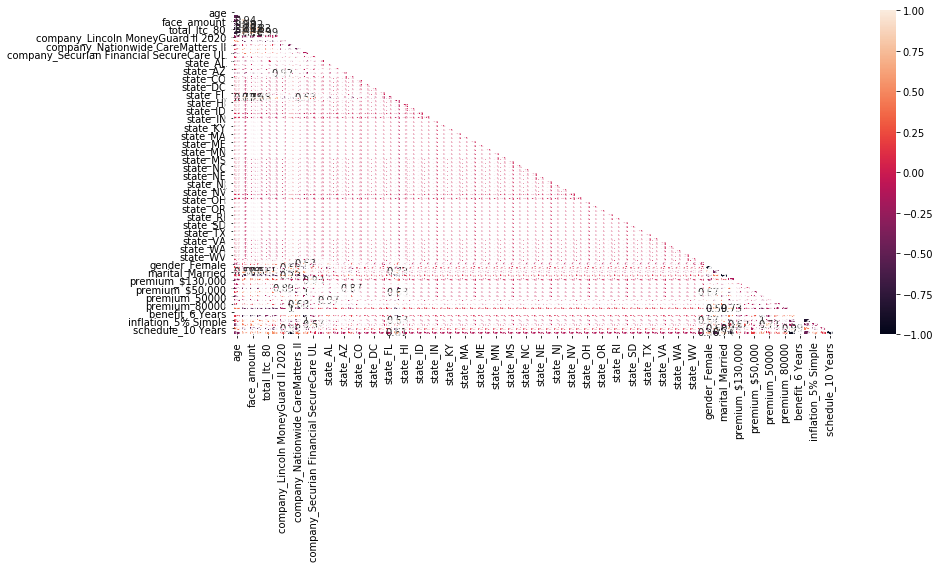

In [78]:
plt.figure(figsize=(14,8))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

sns.heatmap(round(df.corr(method='spearman'), 3), mask=mask, annot=True, linewidths=0.5)
plt.tight_layout()
plt.show()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 17 columns):
id                   206 non-null int64
fkey_reference_id    206 non-null int64
company              206 non-null object
state                206 non-null object
gender               206 non-null object
age                  206 non-null int64
marital              206 non-null object
premium              206 non-null object
benefit              206 non-null object
inflation            206 non-null object
schedule             206 non-null object
total_ltc            206 non-null int64
face_amount          206 non-null int64
monthly_ltc          206 non-null int64
total_ltc_80         204 non-null float64
monthly_ltc_80       204 non-null float64
timestamp            206 non-null object
dtypes: float64(2), int64(6), object(9)
memory usage: 27.5+ KB


In [26]:
df.head()

,id,fkey_reference_id,company,state,gender,age,marital,premium,benefit,inflation,schedule,total_ltc,face_amount,monthly_ltc,total_ltc_80,monthly_ltc_80,timestamp
0,123440,1115,Nationwide CareMatters II,AL,Female,40,Married,60000,6 Years,3% Compound,Single Pay,307778,102593,4275,1050839.0,13538.0,9/23/2019 2:21:12 AM
1,123441,1115,Nationwide CareMatters II,AL,Female,41,Married,60000,6 Years,3% Compound,Single Pay,284222,94741,3948,942147.0,12138.0,9/23/2019 2:25:29 AM
2,123442,1115,Nationwide CareMatters II,AL,Female,42,Married,60000,6 Years,3% Compound,Single Pay,278261,92754,3865,895522.0,11537.0,9/23/2019 2:26:47 AM
3,123443,1115,Nationwide CareMatters II,AL,Female,43,Married,60000,6 Years,3% Compound,Single Pay,272546,90849,3785,851580.0,10971.0,9/23/2019 2:26:59 AM
4,123444,1115,Nationwide CareMatters II,AL,Female,44,Married,60000,6 Years,3% Compound,Single Pay,267060,89020,3709,810135.0,10437.0,9/23/2019 2:27:11 AM


In [27]:
df['company']=df['company'].astype('category')

In [28]:
df.head()

,id,fkey_reference_id,company,state,gender,age,marital,premium,benefit,inflation,schedule,total_ltc,face_amount,monthly_ltc,total_ltc_80,monthly_ltc_80,timestamp
0,123440,1115,Nationwide CareMatters II,AL,Female,40,Married,60000,6 Years,3% Compound,Single Pay,307778,102593,4275,1050839.0,13538.0,9/23/2019 2:21:12 AM
1,123441,1115,Nationwide CareMatters II,AL,Female,41,Married,60000,6 Years,3% Compound,Single Pay,284222,94741,3948,942147.0,12138.0,9/23/2019 2:25:29 AM
2,123442,1115,Nationwide CareMatters II,AL,Female,42,Married,60000,6 Years,3% Compound,Single Pay,278261,92754,3865,895522.0,11537.0,9/23/2019 2:26:47 AM
3,123443,1115,Nationwide CareMatters II,AL,Female,43,Married,60000,6 Years,3% Compound,Single Pay,272546,90849,3785,851580.0,10971.0,9/23/2019 2:26:59 AM
4,123444,1115,Nationwide CareMatters II,AL,Female,44,Married,60000,6 Years,3% Compound,Single Pay,267060,89020,3709,810135.0,10437.0,9/23/2019 2:27:11 AM


In [29]:
df.dtypes

id                      int64
fkey_reference_id       int64
company              category
state                  object
gender                 object
age                     int64
marital                object
premium                object
benefit                object
inflation              object
schedule               object
total_ltc               int64
face_amount             int64
monthly_ltc             int64
total_ltc_80          float64
monthly_ltc_80        float64
timestamp              object
dtype: object

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le = LabelEncoder()

In [59]:
df['company'] = le.fit_transform(df['company'])
df['state'] = le.fit_transform(df['state'])
df['gender'] = le.fit_transform(df['gender'])
df['marital'] = le.fit_transform(df['marital'])
df['benefit'] = le.fit_transform(df['benefit'])
df['inflation'] = le.fit_transform(df['inflation'])
df['schedule'] = le.fit_transform(df['schedule'])
df['premium'] = le.fit_transform(df['premium'])

In [60]:
df.head()

,company,state,gender,age,marital,premium,benefit,inflation,schedule,total_ltc,face_amount,monthly_ltc,total_ltc_80,monthly_ltc_80
0,2,1,0,40,0,5,0,0,1,307778,102593,4275,1050839.0,13538.0
1,2,1,0,41,0,5,0,0,1,284222,94741,3948,942147.0,12138.0
2,2,1,0,42,0,5,0,0,1,278261,92754,3865,895522.0,11537.0
3,2,1,0,43,0,5,0,0,1,272546,90849,3785,851580.0,10971.0
4,2,1,0,44,0,5,0,0,1,267060,89020,3709,810135.0,10437.0


In [61]:
df.dtypes

company             int64
state               int64
gender              int64
age                 int64
marital             int64
premium             int64
benefit             int64
inflation           int64
schedule            int64
total_ltc           int64
face_amount         int64
monthly_ltc         int64
total_ltc_80      float64
monthly_ltc_80    float64
dtype: object

In [62]:
df.shape

(204, 14)

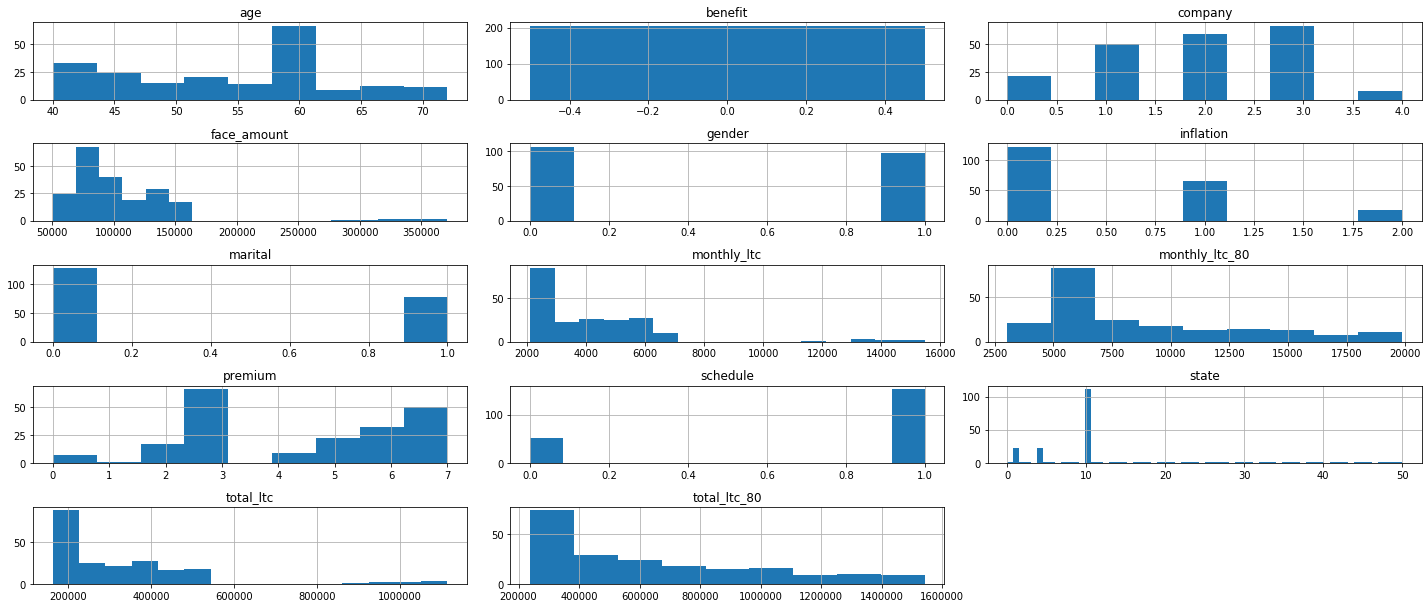

In [63]:
df.hist(figsize=(20,10), layout=(6,3), bins='auto')
plt.tight_layout()
plt.show()

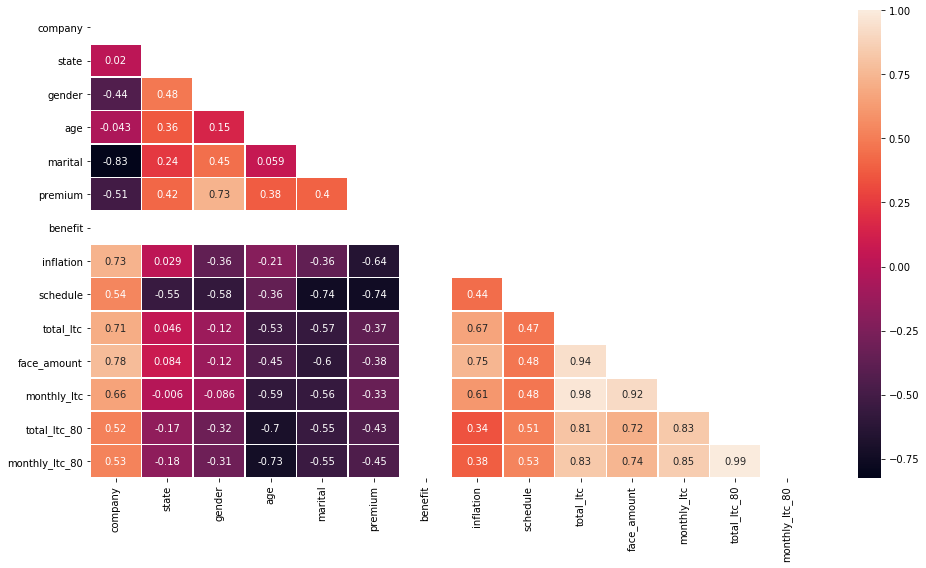

In [64]:
plt.figure(figsize=(14,8))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

sns.heatmap(round(df.corr(method='spearman'), 3), mask=mask, annot=True, linewidths=0.5)
plt.tight_layout()
plt.show()